In [8]:
import xarray as xr
import netCDF4 as nc
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cmocean.cm as cm
import datetime as dt
import matplotlib.patches as mpatches
from matplotlib.colors import LogNorm
import pickle
import os
from salishsea_tools import viz_tools, geo_tools
import arrow
import copy
import math
import matplotlib.dates as mdates

In [9]:
mycmap = copy.copy(cm.oxy)
mycmap.set_bad('darkgreen')

In [10]:

lonSI1 = -123.58
lonSI2 = -123.44
latSI1 = 48.5
latSI2 = 48.695

In [14]:
#df_gridold = xr.open_dataset('/data/atall/MEOPAR/SalishSeaCast/results/daily/SalishSea_1d_20180901_20181130_grid_T.nc')
df_chemold = xr.open_dataset('/data/atall/MEOPAR/SalishSeaCast/results/daily/SalishSea_1d_20180901_20181130_chem_T.nc')
df_biolold = xr.open_dataset('/data/atall/MEOPAR/SalishSeaCast/results/daily/SalishSea_1d_20180901_20181130_biol_T.nc')

#df_gridnew = xr.open_dataset('/ocean/atall/MOAD/Model/runs/salishsea_oxy/with_dia/SalishSea_1d_20180901_20181130_grid_T.nc')
df_chemnew = xr.open_dataset('/ocean/atall/MOAD/Model/runs/salishsea_oxy/with_dia/SalishSea_1d_20180901_20181130_chem_T.nc')
df_biolnew = xr.open_dataset('/ocean/atall/MOAD/Model/runs/salishsea_oxy/with_dia/SalishSea_1d_20180901_20181130_biol_T.nc')


In [15]:
# Constant and data rang
kk, jj, ii = 27, 353, 209 # Patricia bay 
syear = 2018
eyear = 2018
smonth = 9
emonth = 11
startdate = arrow.get(syear, smonth, 1)
enddate = arrow.get(eyear, emonth, 30)
print (startdate, enddate, jj, ii)

2018-09-01T00:00:00+00:00 2018-11-30T00:00:00+00:00 353 209


# Oxygen and Zooplancton concentrations

In [16]:
#
print(np.array(df_chemnew.dissolved_oxygen[0,:kk,jj,ii].nav_lat),np.array(df_chemnew.dissolved_oxygen[0,:kk,jj,ii].nav_lon),np.array(df_chemnew.dissolved_oxygen[0,:kk,jj,ii].deptht))

48.652397 -123.48762 [ 0.5000003  1.5000031  2.5000114  3.5000305  4.5000706  5.5001507
  6.5003104  7.500623   8.501236   9.502433  10.5047655 11.509312
 12.518167  13.535412  14.568982  15.634288  16.761173  18.007135
 19.481785  21.389978  24.100256  28.229916  34.685757  44.517723
 58.484333  76.58559   98.06296  ]


In [17]:
diff_oxy = df_chemnew.dissolved_oxygen[:,:kk,jj,ii] - df_chemold.dissolved_oxygen[:,:kk,jj,ii]
diff_mes = df_biolnew.mesozooplankton[:,:kk,jj,ii] - df_biolold.mesozooplankton[:,:kk,jj,ii]
diff_mic = df_biolnew.microzooplankton[:,:kk,jj,ii] - df_biolold.microzooplankton[:,:kk,jj,ii]
diff_nit = df_biolnew.nitrate[:,:kk,jj,ii] - df_biolold.nitrate[:,:kk,jj,ii]
diff_pon = df_biolnew.particulate_organic_nitrogen[:,:kk,jj,ii] - df_biolold.particulate_organic_nitrogen[:,:kk,jj,ii]
diff_don = df_biolnew.dissolved_organic_nitrogen[:,:kk,jj,ii] - df_biolold.dissolved_organic_nitrogen[:,:kk,jj,ii]


Text(0.5, 1.0, '')

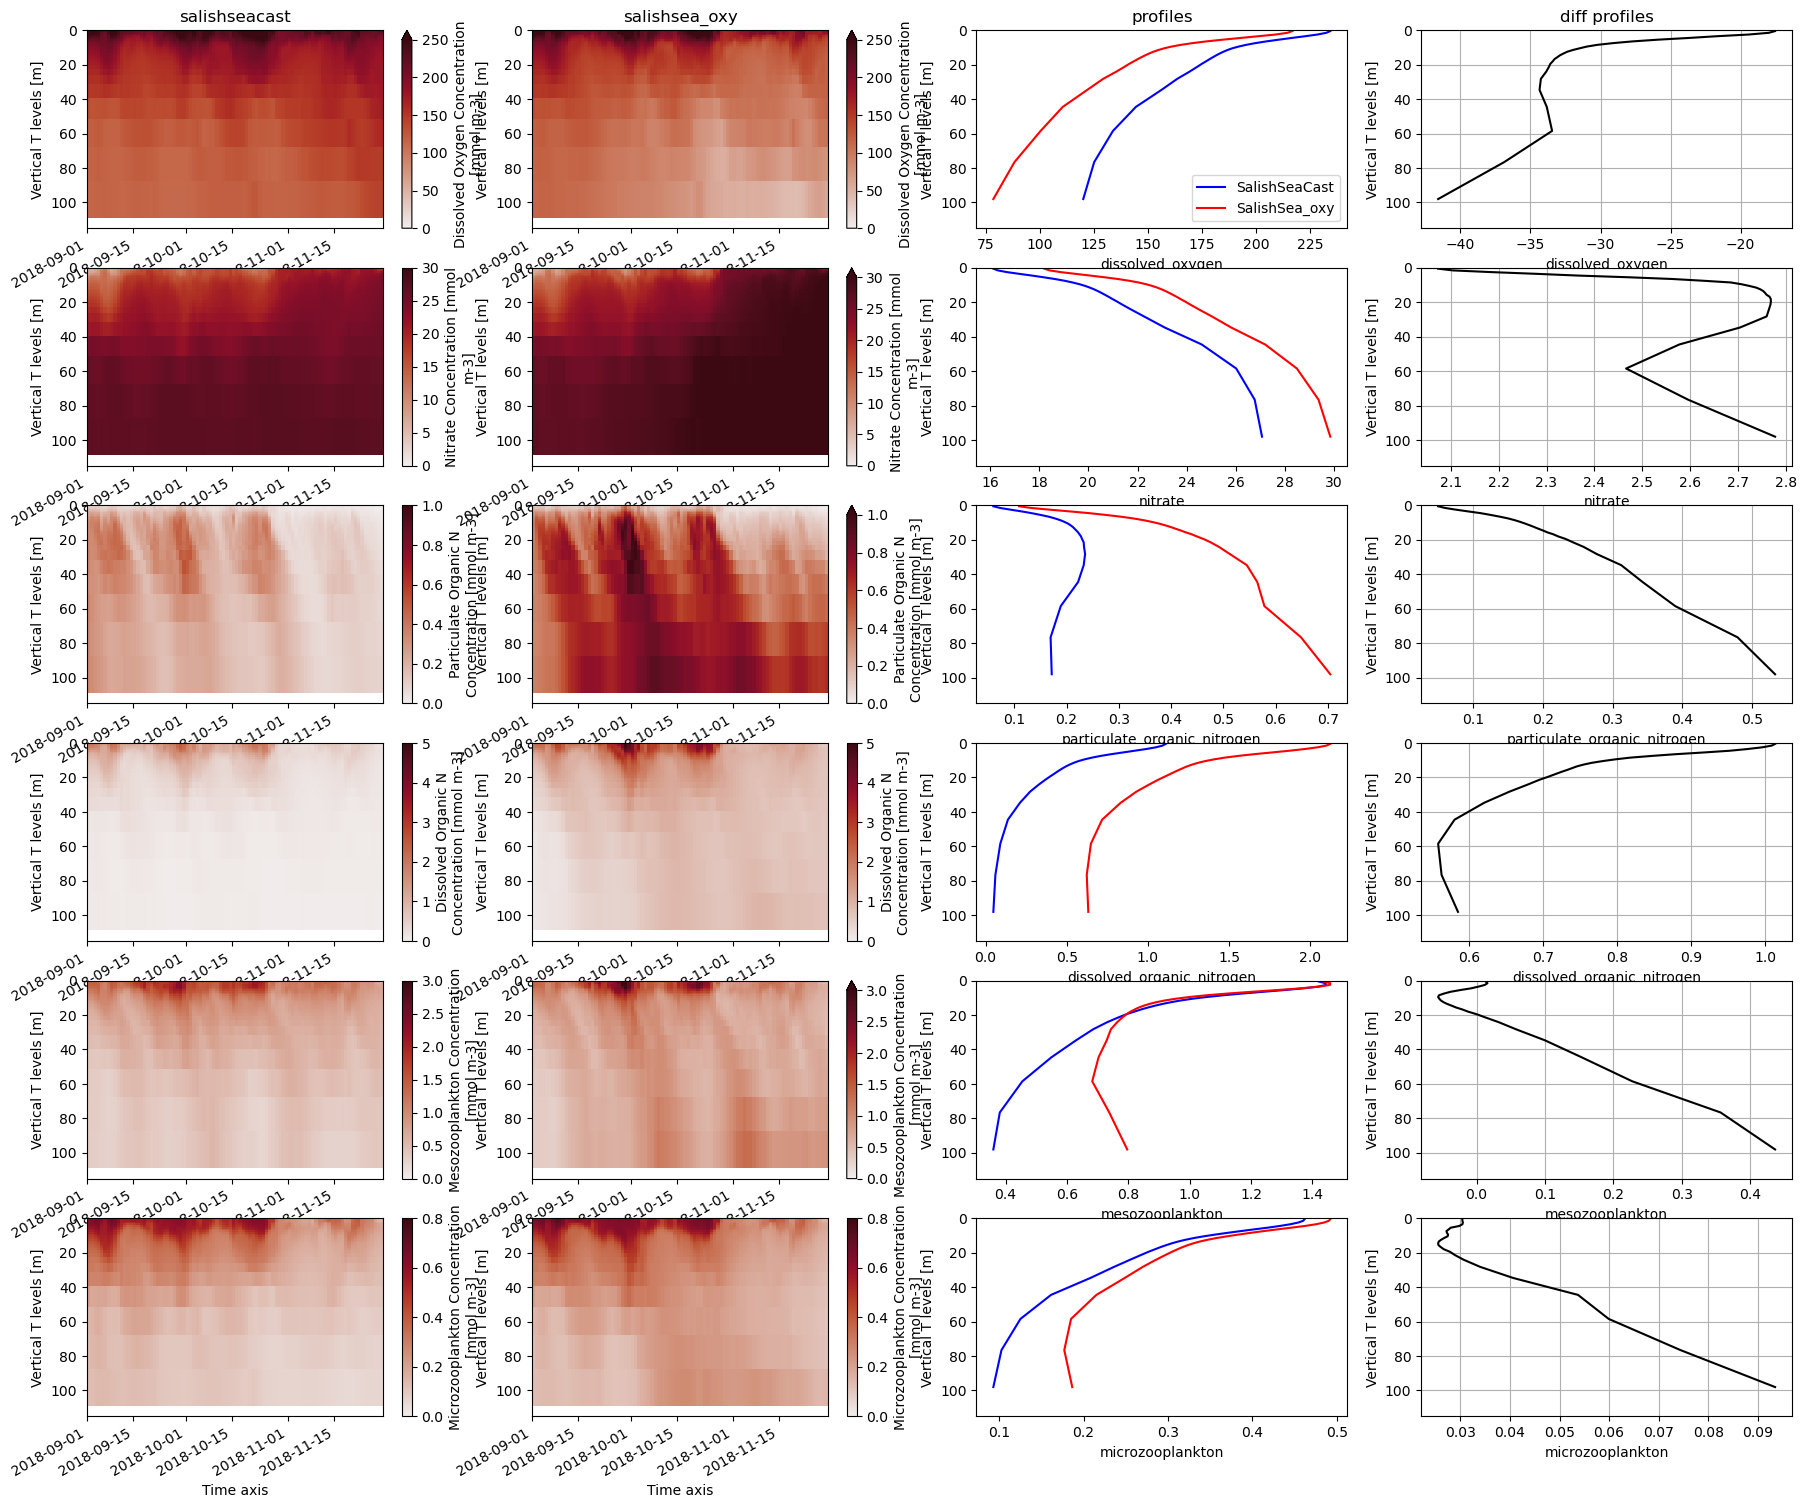

In [18]:
fig, ax = plt.subplots(6, 4, figsize = (22, 18)) 
df_chemold.dissolved_oxygen[:,:kk,jj,ii].plot(ax=ax[0,0], y="deptht", yincrease=False, cmap=cm.amp, vmin=0, vmax=250, ylim=(115, 0), xlim=(startdate, enddate));
df_chemnew.dissolved_oxygen[:,:kk,jj,ii].plot(ax=ax[0,1], y="deptht", yincrease=False, cmap=cm.amp, vmin=0, vmax=250, ylim=(115, 0), xlim=(startdate, enddate));
np.mean(df_chemold.dissolved_oxygen[:,:kk,jj,ii], axis=0).plot(ax=ax[0,2], y="deptht", yincrease=False, ylim=(115, 0), color='b', label='SalishSeaCast');
np.mean(df_chemnew.dissolved_oxygen[:,:kk,jj,ii], axis=0).plot(ax=ax[0,2], y="deptht", yincrease=False, ylim=(115, 0), color='r', label='SalishSea_oxy');
ax[0,2].legend()
np.mean(diff_oxy, axis=0).plot(ax=ax[0,3], y="deptht", yincrease=False, ylim=(115, 0), color='k');
ax[0,3].grid()
ax[0,0].set_title('salishseacast') 
ax[0,1].set_title('salishsea_oxy') #Mesozoo excretion and mortality, microzoo and mesozoo grazing PON to NH, DON
ax[0,2].set_title('profiles')
ax[0,3].set_title('diff profiles')

df_biolold.nitrate[:,:kk,jj,ii].plot(ax=ax[1,0], y="deptht", yincrease=False, cmap=cm.amp, vmin=0, vmax=30, ylim=(115, 0), xlim=(startdate, enddate));
df_biolnew.nitrate[:,:kk,jj,ii].plot(ax=ax[1,1], y="deptht", yincrease=False, cmap=cm.amp, vmin=0, vmax=30, ylim=(115, 0), xlim=(startdate, enddate));
np.mean(df_biolold.nitrate[:,:kk,jj,ii], axis=0).plot(ax=ax[1,2], y="deptht", yincrease=False, ylim=(115, 0), color='b');
np.mean(df_biolnew.nitrate[:,:kk,jj,ii], axis=0).plot(ax=ax[1,2], y="deptht", yincrease=False, ylim=(115, 0), color='r');
np.mean(diff_nit, axis=0).plot(ax=ax[1,3], y="deptht", yincrease=False, ylim=(115, 0), color='k');
ax[1,3].grid()
ax[1,0].set_title('')
ax[1,1].set_title('')
ax[1,2].set_title('')
ax[1,3].set_title('')

df_biolold.particulate_organic_nitrogen[:,:kk,jj,ii].plot(ax=ax[2,0], y="deptht", yincrease=False, cmap=cm.amp, vmin=0, vmax=1, ylim=(115, 0), xlim=(startdate, enddate));
df_biolnew.particulate_organic_nitrogen[:,:kk,jj,ii].plot(ax=ax[2,1], y="deptht", yincrease=False, cmap=cm.amp, vmin=0, vmax=1, ylim=(115, 0), xlim=(startdate, enddate));
np.mean(df_biolold.particulate_organic_nitrogen[:,:kk,jj,ii], axis=0).plot(ax=ax[2,2], y="deptht", yincrease=False, ylim=(115, 0), color='b');
np.mean(df_biolnew.particulate_organic_nitrogen[:,:kk,jj,ii], axis=0).plot(ax=ax[2,2], y="deptht", yincrease=False, ylim=(115, 0), color='r');
np.mean(diff_pon, axis=0).plot(ax=ax[2,3], y="deptht", yincrease=False, ylim=(115, 0), color='k');
ax[2,3].grid()
ax[2,0].set_title('')
ax[2,1].set_title('')
ax[2,2].set_title('')
ax[2,3].set_title('')

df_biolold.dissolved_organic_nitrogen[:,:kk,jj,ii].plot(ax=ax[3,0], y="deptht", yincrease=False, cmap=cm.amp, vmin=0, vmax=5, ylim=(115, 0), xlim=(startdate, enddate));
df_biolnew.dissolved_organic_nitrogen[:,:kk,jj,ii].plot(ax=ax[3,1], y="deptht", yincrease=False, cmap=cm.amp, vmin=0, vmax=5, ylim=(115, 0), xlim=(startdate, enddate));
np.mean(df_biolold.dissolved_organic_nitrogen[:,:kk,jj,ii], axis=0).plot(ax=ax[3,2], y="deptht", yincrease=False, ylim=(115, 0), color='b');
np.mean(df_biolnew.dissolved_organic_nitrogen[:,:kk,jj,ii], axis=0).plot(ax=ax[3,2], y="deptht", yincrease=False, ylim=(115, 0), color='r');
np.mean(diff_don, axis=0).plot(ax=ax[3,3], y="deptht", yincrease=False, ylim=(115, 0), color='k');
ax[3,3].grid()
ax[3,0].set_title('')
ax[3,1].set_title('')
ax[3,2].set_title('')
ax[3,3].set_title('')

df_biolold.mesozooplankton[:,:kk,jj,ii].plot(ax=ax[4,0], y="deptht", yincrease=False, cmap=cm.amp, vmin=0, vmax=3, ylim=(115, 0), xlim=(startdate, enddate));
df_biolnew.mesozooplankton[:,:kk,jj,ii].plot(ax=ax[4,1], y="deptht", yincrease=False, cmap=cm.amp, vmin=0, vmax=3, ylim=(115, 0), xlim=(startdate, enddate));
np.mean(df_biolold.mesozooplankton[:,:kk,jj,ii], axis=0).plot(ax=ax[4,2], y="deptht", yincrease=False, ylim=(115, 0), color='b');
np.mean(df_biolnew.mesozooplankton[:,:kk,jj,ii], axis=0).plot(ax=ax[4,2], y="deptht", yincrease=False, ylim=(115, 0), color='r');
np.mean(diff_mes, axis=0).plot(ax=ax[4,3], y="deptht", yincrease=False, ylim=(115, 0), color='k');
ax[4,3].grid()
ax[4,0].set_title('')
ax[4,1].set_title('')
ax[4,2].set_title('')
ax[4,3].set_title('')

df_biolold.microzooplankton[:,:kk,jj,ii].plot(ax=ax[5,0], y="deptht", yincrease=False, cmap=cm.amp, vmin=0, vmax=0.8, ylim=(115, 0), xlim=(startdate, enddate));
df_biolnew.microzooplankton[:,:kk,jj,ii].plot(ax=ax[5,1], y="deptht", yincrease=False, cmap=cm.amp, vmin=0, vmax=0.8, ylim=(115, 0), xlim=(startdate, enddate));
np.mean(df_biolold.microzooplankton[:,:kk,jj,ii], axis=0).plot(ax=ax[5,2], y="deptht", yincrease=False, ylim=(115, 0), color='b');
np.mean(df_biolnew.microzooplankton[:,:kk,jj,ii], axis=0).plot(ax=ax[5,2], y="deptht", yincrease=False, ylim=(115, 0), color='r');
np.mean(diff_mic, axis=0).plot(ax=ax[5,3], y="deptht", yincrease=False, ylim=(115, 0), color='k');
ax[5,3].grid()
ax[5,0].set_title('')
ax[5,1].set_title('')
ax[5,2].set_title('')
ax[5,3].set_title('')